# MFCC features visualisation

In [1]:
from scipy.io import wavfile
import pandas as pd
import python_speech_features as psf
import numpy as np
import matplotlib.pyplot as plt

mfcc_feat = []

In [2]:
fs, data = wavfile.read('./data/rap/sing002/sing002_1.wav')
mfcc_feat.append(psf.mfcc(data,fs, winfunc=np.hamming))

In [3]:
fs, data = wavfile.read('./data/singing/sing003/sing003_1.wav')
mfcc_feat.append(psf.mfcc(data,fs, winfunc=np.hamming))

In [4]:
fs, data = wavfile.read('./data/speech/01b/01bo030x.wav')
mfcc_feat.append(psf.mfcc(data,fs, winfunc=np.hamming))

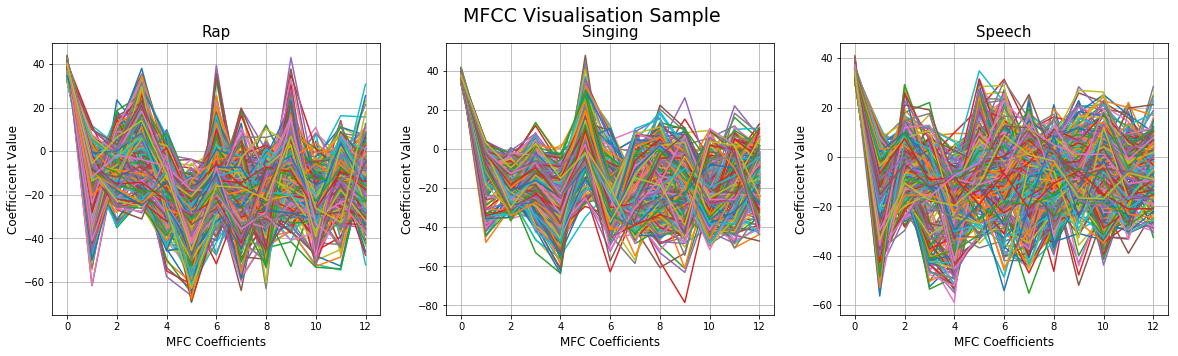

In [7]:
fig1 = plt.figure(figsize=(20, 5))
title_list = ['Rap', 'Singing', 'Speech']
fig1.suptitle('MFCC Visualisation Sample', fontsize=19)
for i, title in enumerate(title_list):
    plt.subplot(131+i)
    plt.title(title, fontsize=15)
    plt.plot(mfcc_feat[i].T)
    plt.xlabel('MFC Coefficients', fontsize=12)
    plt.ylabel('Coefficicent Value', fontsize=12)
    plt.grid()
plt.show()
fig1.savefig("./images/mfcc_sample.pdf", bbox_inches='tight')

# Updating DS with MFCC features

In [144]:
song_df = pd.read_hdf('song_df.h5', 'song_df')

In [145]:
mfcc_feat = []

In [146]:
for i in range(len(song_df.index)):
    mfcc_feat.append(psf.mfcc(song_df.iloc[i].Data,song_df.iloc[i].Freq, winfunc=np.hamming))

In [147]:
song_df['MFCC'] = pd.Series(mfcc_feat, index=song_df.index)

In [148]:
song_df.to_hdf('song_df.h5', key='song_df')

/disk/scratch/s1769454/anaconda3/envs/dissertation/lib/python3.6/site-packages/pandas-0.23.1-py3.6-linux-x86_64.egg/pandas/core/generic.py:1993: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['Data', 'MFCC']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


# Generating the X and Y for Training & Testing

In [149]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [150]:
song_df = pd.read_hdf('song_df.h5', 'song_df')
X = song_df.MFCC.values
y = song_df.Type.values

onehot_encoder = OneHotEncoder(sparse=False)
y = onehot_encoder.fit_transform(y.reshape(len(y), 1))
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [151]:
X_new = np.zeros((1440, 299, 13))
for i,d in enumerate(X):
    X_new[i,:,:] = d[:, :]
print(X_new.shape)
X = X_new

(1440, 299, 13)


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [153]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [154]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(1101, 299, 13) (1101, 3)
(195, 299, 13) (195, 3)
(144, 299, 13) (144, 3)


In [155]:
# Saving the generated datasets

# Training set
np.save("./numpy_ds/x_train", X_train)
np.save("./numpy_ds/y_train", y_train)

# Validation set
np.save("./numpy_ds/x_val", X_val)
np.save("./numpy_ds/y_val", y_val)

# Test set
np.save("./numpy_ds/x_test", X_test)
np.save("./numpy_ds/y_test", y_test)

In [156]:
list_of_y = {0:0, 1:0, 2:0}
for i in range(y_test.shape[0]):
    num = 0
    for j in range(3):
        num+=y_test[i,j]*j
    list_of_y[num] += 1
print("Distribution of Examples: ", list_of_y)

Distribution of Examples:  {0: 52, 1: 48, 2: 44}


In [157]:
total = list_of_y[0]+list_of_y[1]+list_of_y[2]
perc_of_y = {0:list_of_y[0]*100/total, 1:list_of_y[1]*100/total, 2:list_of_y[2]*100/total}
print("Percentage Distribution: ", perc_of_y)

Percentage Distribution:  {0: 36.111111111111114, 1: 33.333333333333336, 2: 30.555555555555557}


In [158]:
X

array([[[ 39.20967033,   7.84264114,  -9.93582939, ..., -23.38705497,
           4.44254679, -12.40317789],
        [ 38.97134558,  10.36146525,  -8.08457559, ..., -23.17282804,
          -2.18367194,   2.4019069 ],
        [ 38.96790867,  10.99594513,  -4.08885795, ..., -14.55153004,
          -0.09021952,  -4.40474733],
        ...,
        [ 37.12134609,   8.73464098, -19.87457625, ...,   2.00698375,
           2.13958202,   5.52996777],
        [ 36.93421789,   9.83843738, -18.07022815, ...,   3.97365177,
           5.98756589,  -6.24929818],
        [ 36.86404445,   8.09202556, -21.54895251, ...,  -7.47219275,
           8.56466707,  -1.78992957]],

       [[ 35.86394721,  -7.79461309,  -8.21689988, ..., -15.63584094,
          -8.48753576,  -1.92919107],
        [ 36.71944669,  -5.76669674,  -5.85891246, ..., -15.86699935,
          -9.50497311,  -0.3381146 ],
        [ 38.57269598,  -2.60101156, -13.95776044, ..., -10.59923736,
         -13.6992836 ,   7.31906895],
        ...,
